# 1. Load and Preprocess the Dataset


### Data Preprocessing

In [1]:
# Libraries and Dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
def load_dataset():
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    return df

# Load and display the first few rows of the dataset
df = load_dataset()
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Initial  Outlier Detection (Boxplot)


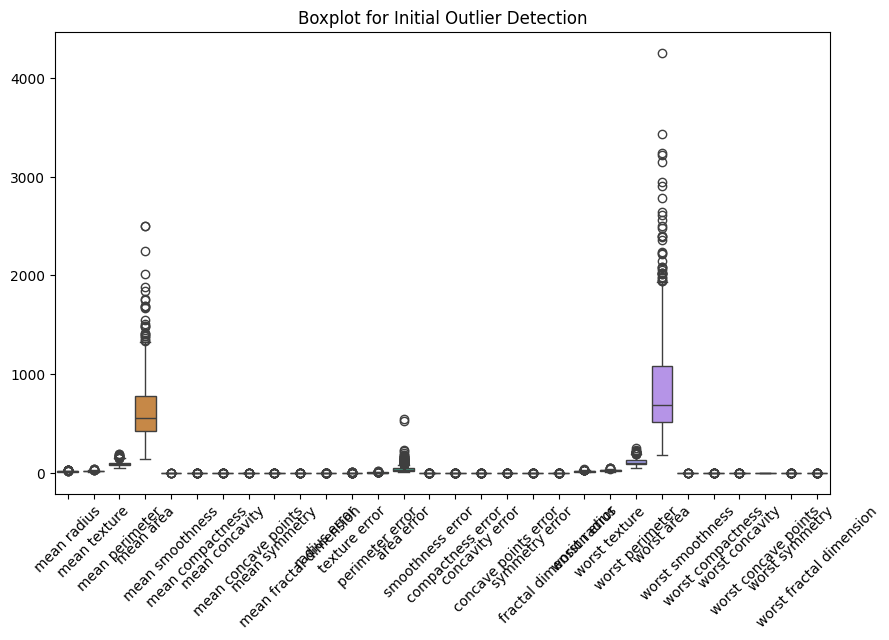

In [ ]:
# Visualize initial outliers with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for Initial Outlier Detection")
plt.xticks(rotation=45)
plt.show()

### Data Normalization (Z-score)

In [3]:
from sklearn.preprocessing import StandardScaler

# Data Normalization
def normalize_data(df):
    scaler = StandardScaler()
    normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return normalized_df

# Normalize the data
normalized_df = normalize_data(df)
normalized_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# 2. Anomaly Detection

### Z-score Based Anomaly Detection

In [4]:
# Function for Z-score based anomaly detection
def z_score_anomaly_detection(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    anomalies = (z_scores > threshold).any(axis=1)
    return anomalies

# Apply Z-score anomaly detection
z_anomalies = z_score_anomaly_detection(normalized_df)
print(f"Z-score detected {z_anomalies.sum()} anomalies.")


Z-score detected 74 anomalies.


### Mahalanobis Distance Based Anomaly Detection


In [5]:
from scipy.spatial.distance import mahalanobis

# Mahalanobis Distance Based Anomaly Detection
def mahalanobis_anomaly_detection(df):
    mean = df.mean().values
    cov_matrix = np.cov(df.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    distances = df.apply(lambda row: mahalanobis(row, mean, inv_cov_matrix), axis=1)
    threshold = np.percentile(distances, 97.5)
    anomalies = distances > threshold
    return anomalies

# Apply Mahalanobis Distance anomaly detection
m_anomalies = mahalanobis_anomaly_detection(normalized_df)
print(f"Mahalanobis Distance detected {m_anomalies.sum()} anomalies.")


Mahalanobis Distance detected 15 anomalies.


### Local Outlier Factor (LOF) Based Anomaly Detection


In [6]:
from sklearn.neighbors import LocalOutlierFactor

# Local Outlier Factor (LOF) Anomaly Detection
def lof_anomaly_detection(df, n_neighbors=20):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    labels = lof.fit_predict(df)
    anomalies = labels == -1
    return anomalies

# Apply LOF anomaly detection
lof_anomalies = lof_anomaly_detection(normalized_df)
print(f"LOF detected {lof_anomalies.sum()} anomalies.")


LOF detected 31 anomalies.


### Isolation Forest Based Anomaly Detection


In [7]:
from sklearn.ensemble import IsolationForest

# Isolation Forest Anomaly Detection
def isolation_forest_anomaly_detection(df):
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    labels = iso_forest.fit_predict(df)
    anomalies = labels == -1
    return anomalies

# Apply Isolation Forest anomaly detection
iso_forest_anomalies = isolation_forest_anomaly_detection(normalized_df)
print(f"Isolation Forest detected {iso_forest_anomalies.sum()} anomalies.")


Isolation Forest detected 29 anomalies.


### One-Class SVM Based Anomaly Detection


In [8]:
from sklearn.svm import OneClassSVM

# One-Class SVM Anomaly Detection
def one_class_svm_anomaly_detection(df):
    oc_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
    labels = oc_svm.fit_predict(df)
    anomalies = labels == -1
    return anomalies

# Apply One-Class SVM anomaly detection
svm_anomalies = one_class_svm_anomaly_detection(normalized_df)
print(f"One-Class SVM detected {svm_anomalies.sum()} anomalies.")


One-Class SVM detected 96 anomalies.


# 3. Comparison and Evaluation:

### Evaluation Metrics for Each Method


In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Function to calculate evaluation metrics
def evaluate_metrics(true_labels, detected_anomalies):
    precision = precision_score(true_labels, detected_anomalies, zero_division=0)
    recall = recall_score(true_labels, detected_anomalies, zero_division=0)
    accuracy = accuracy_score(true_labels, detected_anomalies)
    return precision, recall, accuracy

# Generate synthetic labels for demonstration (1 for anomalies, 0 for normal points)
true_labels = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])

# Dictionary to store results
results = {
    'Z-score': evaluate_metrics(true_labels, z_anomalies),
    'Mahalanobis': evaluate_metrics(true_labels, m_anomalies),
    'LOF': evaluate_metrics(true_labels, lof_anomalies),
    'Isolation Forest': evaluate_metrics(true_labels, iso_forest_anomalies),
    'One-Class SVM': evaluate_metrics(true_labels, svm_anomalies)
}

# Display results
results_df = pd.DataFrame(results, index=['Precision', 'Recall', 'Accuracy']).T
results_df


,Precision,Recall,Accuracy
Z-score,0.067568,0.208333,0.845343
Mahalanobis,0.000000,0.000000,0.931459
LOF,0.032258,0.041667,0.906854
Isolation Forest,0.034483,0.041667,0.910369
One-Class SVM,0.041667,0.166667,0.803163


### Visualization of Anomalies

In [ ]:
# Function to visualize anomalies
def visualize_anomalies(df, detected_anomalies, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1],
                     hue=detected_anomalies, palette=
                        {True: 'red', False: 'blue'}, 
                            alpha=0.6, edgecolor=None)
    plt.title(title)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.show()


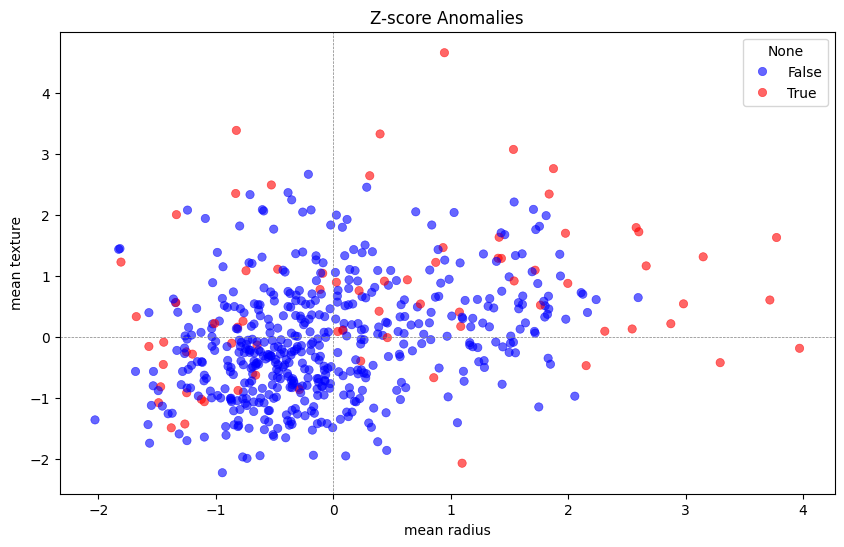

In [11]:
# Visualize anomalies for each method
visualize_anomalies(normalized_df, z_anomalies, "Z-score Anomalies")


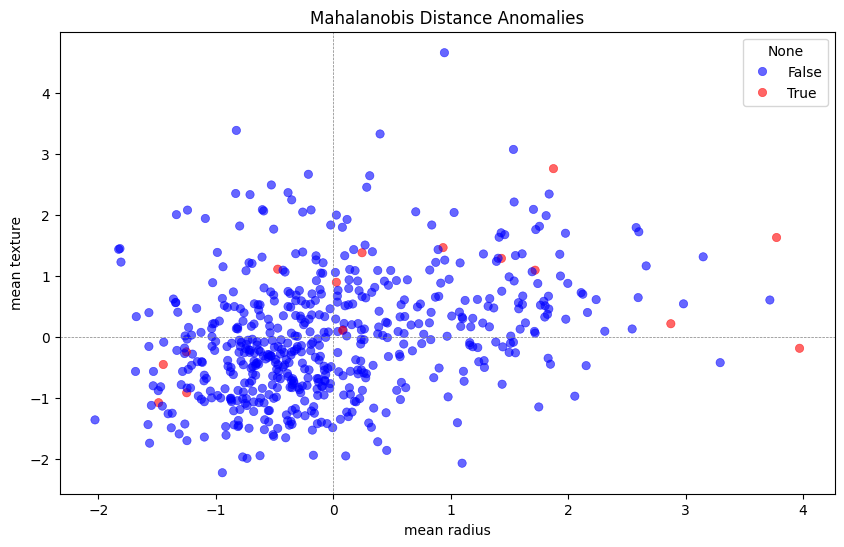

In [ ]:
visualize_anomalies(normalized_df, m_anomalies, "Mahalanobis Distance Anomalies")

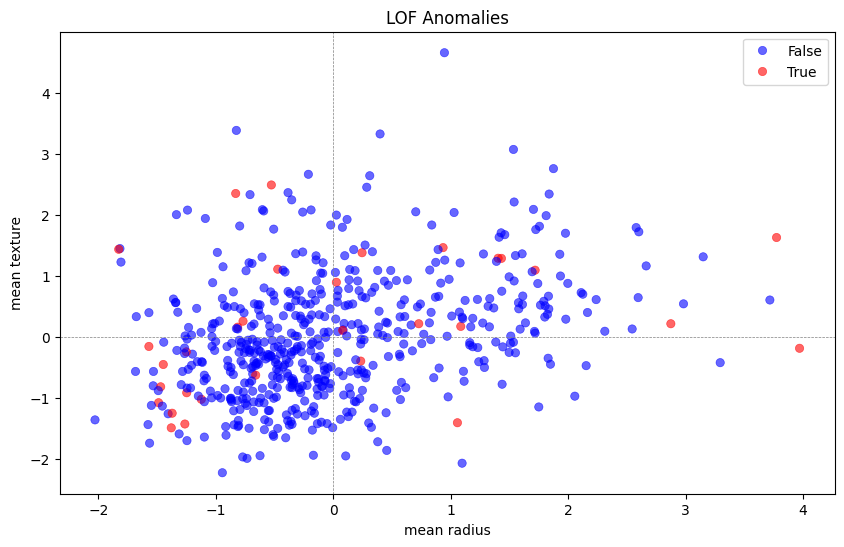

In [13]:
visualize_anomalies(normalized_df, lof_anomalies, "LOF Anomalies")


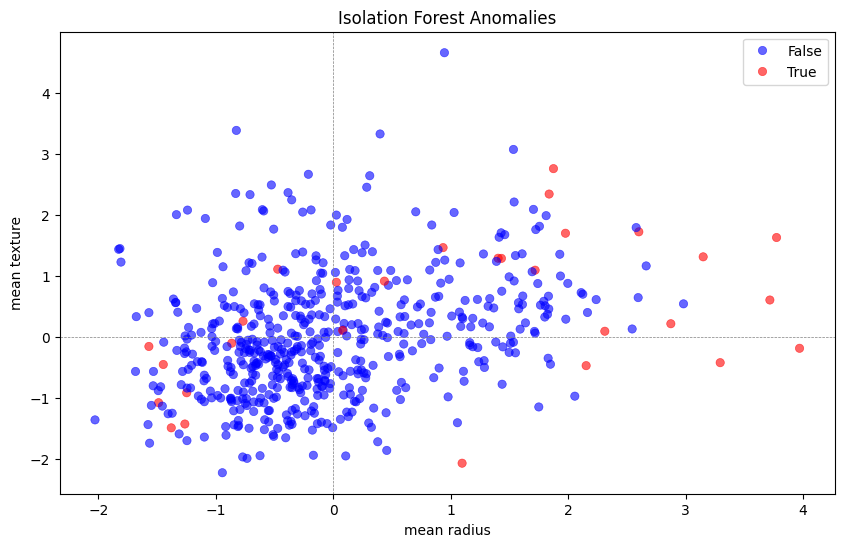

In [14]:
visualize_anomalies(normalized_df, iso_forest_anomalies, "Isolation Forest Anomalies")


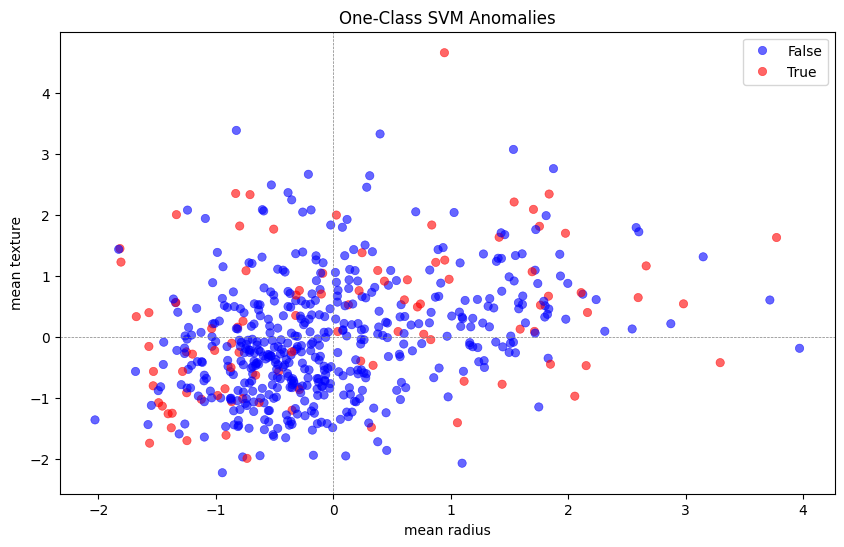

In [15]:
visualize_anomalies(normalized_df, svm_anomalies, "One-Class SVM Anomalies")
